<a href="https://colab.research.google.com/github/shilpimishra1/cattle_detect/blob/main/masking_box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\ASUS\Downloads\Cattle Breeds\Holstein Friesian cattle\HolsteinFriesiancattle24.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib import pyplot as plt
local_model_path =  r"C:\Users\ASUS\.cache\kagglehub\models\tensorflow\faster-rcnn-resnet-v1\tensorFlow2\faster-rcnn-resnet50-v1-640x640\1"
model=tf.saved_model.load(local_model_path)

# Preprocess the image for the model
input_tensor = tf.image.resize(image_rgb, (640, 640))
input_tensor = tf.cast(input_tensor, tf.uint8)  # Cast to uint8
input_tensor = tf.expand_dims(input_tensor, axis=0)  # Add batch dimension

# Run the model
detections = model.signatures['serving_default'](input_tensor)

# Extract the mask
detection_boxes = detections['detection_boxes'][0].numpy()
detection_scores = detections['detection_scores'][0].numpy()
detection_classes = detections['detection_classes'][0].numpy()


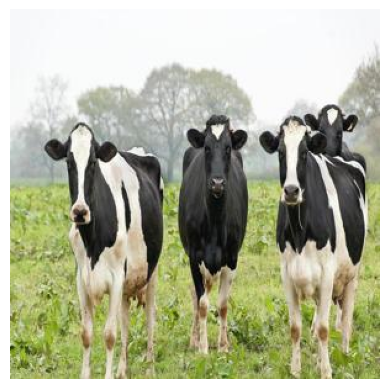

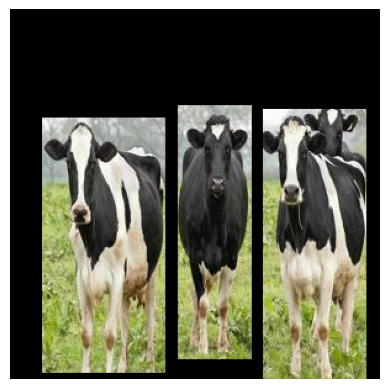

In [ ]:
# Threshold to keep only high-confidence detections
mask_threshold = 0.5
high_confidence_indxs = detection_scores > mask_threshold

high_conf_boxes=detection_boxes[high_confidence_indxs]
high_conf_scores=detection_scores[high_confidence_indxs]
high_conf_classes=detection_boxes[high_confidence_indxs]

# Create an empty mask
final_mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)

# Add all detected masks to the final mask
for i in range(high_conf_boxes.shape[0]):
    y1,x1,y2,x2=high_conf_boxes[i]
    (startY, startX, endY, endX)= (int(y1 * image_rgb.shape[0]),int(x1*image_rgb.shape[1]), int(y2 * image_rgb.shape[0]),int(x2*image_rgb.shape[1]))

    object_mask=np.zeros(image_rgb.shape[:2],dtype=np.uint8)
    object_mask[startY:endY, startX:endX]=1
    final_mask = np.maximum(final_mask, object_mask)

# Apply the mask to the image
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=final_mask)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
# Display the masked image
plt.imshow(masked_image)
plt.axis('off')
plt.show()


In [ ]:
classification_model=tf.keras.model.load_model(r"C:\Users\ASUS\.cache\kagglehub\models\tensorflow\faster-rcnn-resnet-v1\tensorFlow2\faster-rcnn-resnet50-v1-640x640\1")
masked_image_resized=cv2.resize(masked_image,(224,224))
masked_image_normalized=masked_image_resized/255.0
masked_image_expanded=np.expanded_dims(masked_image_normalized,axis=0)

predictions=classification_model.predict(masked_image_expanded)
predicted_class=np.argmax(predictions,axis=1)
print(f'predicted class:{predicted_class}')


AttributeError: module 'keras._tf_keras.keras' has no attribute 'model'

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from matplotlib import pyplot as plt
local_model_path =  r"C:\Users\ASUS\.cache\kagglehub\models\tensorflow\faster-rcnn-resnet-v1\tensorFlow2\faster-rcnn-resnet50-v1-640x640\1"
model=tf.saved_model.load(local_model_path)

# Preprocess the image for the model
input_tensor = tf.image.resize(image_rgb, (640, 640))
input_tensor = tf.cast(input_tensor, tf.uint8)  # Cast to uint8
input_tensor = tf.expand_dims(input_tensor, axis=0)  # Add batch dimension

# Run the model
detections = model.signatures['serving_default'](input_tensor)

# Extract the mask
detection_masks=detections['detection_masks'][0].numpy()
detection_boxes = detections['detection_boxes'][0].numpy()
detection_scores = detections['detection_scores'][0].numpy()
detection_classes = detections['detection_classes'][0].numpy()
# Threshold to keep only high-confidence detections
mask_threshold = 0.5
high_confidence_indxs = detection_scores > mask_threshold

high_conf_masks=detection_masks[high_confidence_indxs]
high_conf_boxes=detection_boxes[high_confidence_indxs]
high_conf_scores=detection_scores[high_confidence_indxs]
high_conf_classes=detection_boxes[high_confidence_indxs]

# Create an empty mask
final_mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)

for mask in high_conf_masks:
    mask=(mask> mask_threshold).astype(np.uint8)
    final_mask=np.maximum(final_mask,mask)

contours,_=cv2.findContours(final_mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours=image_rgb.copy()
cv2.drawContours(image_with_contours, contours, -1,(0,255,0),2)
plt.imshow(image_with_contours)
plt.axis('off')
plt.show()

KeyError: 'detection_masks'

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\ASUS\Downloads\Cattle Breeds\Brown Swiss cattle\BrownSwisscattle54.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

import tensorflow as tf
import numpy as np

# Load the model
local_model_path = r"C:\Users\ASUS\.cache\kagglehub\models\tensorflow\faster-rcnn-resnet-v1\tensorFlow2\faster-rcnn-resnet50-v1-640x640\1"
model = tf.saved_model.load(local_model_path)

# Preprocess the image for the model
input_tensor = tf.image.resize(image_rgb, (640, 640))
input_tensor = tf.cast(input_tensor, tf.uint8)  # Ensure the input tensor is uint8
input_tensor = tf.expand_dims(input_tensor, axis=0)  # Add batch dimension

# Run the model
detections = model.signatures['serving_default'](input_tensor)
# Extract the mask
detection_boxes = detections['detection_boxes'][0].numpy()
detection_scores = detections['detection_scores'][0].numpy()
detection_classes = detections['detection_classes'][0].numpy()
mask_array = detections['detection_masks'][0].numpy()
# Threshold the masks
threshold = 0.5  # Adjust this threshold as needed
binary_masks = mask_array > threshold

# Further processing if needed, such as extracting individual masks or overlaying them on the image

detections = model.signatures['serving_default'](input_tensor)


# Extract high-confidence detections
high_conf_boxes = detection_boxes[high_confidence_idxs]
high_conf_classes = detection_classes[high_confidence_idxs]

# Create an empty mask
final_mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)

# Draw contours around the detected objects
for i, box in enumerate(high_conf_boxes):
    y1, x1, y2, x2 = box
    y1, x1, y2, x2 = int(y1 * image_rgb.shape[0]), int(x1 * image_rgb.shape[1]), int(y2 * image_rgb.shape[0]), int(x2 * image_rgb.shape[1])
    mask = np.zeros(image_rgb.shape[:2], dtype=np.uint8)
    mask[y1:y2, x1:x2] = 1
    final_mask = np.maximum(final_mask, mask)

contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = image_rgb.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(image_with_contours)
plt.axis('off')
plt.show()
